In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [2]:
grocery = []

In [3]:
with open("groceries.csv") as x:
    groceries = x.read()

In [4]:
groceries = groceries.split("\n")

In [5]:
groceries_list = []
for i in groceries:
    groceries_list.append(i.split(","))

In [8]:
all_groceries = [product for transaction in groceries_list for product in transaction]
len(all_groceries)

43368

In [9]:
from collections import Counter
from collections import OrderedDict

item_frequency=Counter(all_groceries)

In [10]:
item_frequency

Counter({'citrus fruit': 814,
         'semi-finished bread': 174,
         'margarine': 576,
         'ready soups': 18,
         'tropical fruit': 1032,
         'yogurt': 1372,
         'coffee': 571,
         'whole milk': 2513,
         'pip fruit': 744,
         'cream cheese ': 390,
         'meat spreads': 42,
         'other vegetables': 1903,
         'condensed milk': 101,
         'long life bakery product': 368,
         'butter': 545,
         'rice': 75,
         'abrasive cleaner': 35,
         'rolls/buns': 1809,
         'UHT-milk': 329,
         'bottled beer': 792,
         'liquor (appetizer)': 78,
         'pot plants': 170,
         'cereals': 56,
         'white bread': 414,
         'bottled water': 1087,
         'chocolate': 488,
         'curd': 524,
         'flour': 171,
         'dishes': 173,
         'beef': 516,
         'frankfurter': 580,
         'soda': 1715,
         'chicken': 422,
         'sugar': 333,
         'fruit/vegetable juice': 711,
   

In [11]:
item_frequency=sorted(item_frequency.items(), key = lambda x:x[1]) 
print(item_frequency)
len(item_frequency)

[('baby food', 1), ('sound storage medium', 1), ('', 1), ('preservation products', 2), ('bags', 4), ('kitchen utensil', 4), ('baby cosmetics', 6), ('frozen chicken', 6), ('toilet cleaner', 7), ('make up remover', 8), ('salad dressing', 8), ('whisky', 8), ('liqueur', 9), ('rubbing alcohol', 10), ('hair spray', 11), ('frozen fruits', 12), ('cream', 13), ('honey', 15), ('decalcifier', 15), ('organic products', 16), ('specialty vegetables', 17), ('ready soups', 18), ('flower soil/fertilizer', 19), ('prosecco', 20), ('cocoa drinks', 22), ('organic sausage', 22), ('pudding powder', 23), ('tidbits', 23), ('cooking chocolate', 25), ('soap', 26), ('bathroom cleaner', 27), ('cookware', 27), ('potato products', 28), ('fish', 29), ('snack products', 30), ('nut snack', 31), ('artif. sweetener', 32), ('canned fruit', 32), ('syrup', 32), ('nuts/prunes', 33), ('abrasive cleaner', 35), ('skin care', 35), ('specialty fat', 36), ('tea', 38), ('brandy', 41), ('light bulbs', 41), ('meat spreads', 42), ('ke

170

In [12]:
frequency = list(reversed([i[1] for i in item_frequency]))
items = list(reversed([i[0] for i in item_frequency]))

print(len(frequency))
print(len(items))

170
170


In [13]:
print(frequency[0:10])
print(items[0:10])

[2513, 1903, 1809, 1715, 1372, 1087, 1072, 1032, 969, 924]
['whole milk', 'other vegetables', 'rolls/buns', 'soda', 'yogurt', 'bottled water', 'root vegetables', 'tropical fruit', 'shopping bags', 'sausage']


In [14]:
del frequency[0]
del items[0]

In [15]:
print(frequency[0:10])
print(items[0:10])

[1903, 1809, 1715, 1372, 1087, 1072, 1032, 969, 924, 875]
['other vegetables', 'rolls/buns', 'soda', 'yogurt', 'bottled water', 'root vegetables', 'tropical fruit', 'shopping bags', 'sausage', 'pastry']


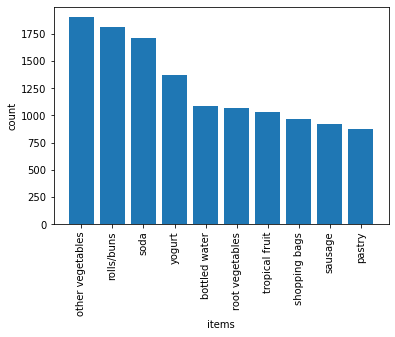

In [16]:
plt.bar (items[0:10],height = frequency[0:10])
plt.xticks(list(range(0,10),),items[0:10], rotation = 90)
plt.xlabel("items")
plt.ylabel("count")
plt.show()

In [17]:
groceries_series  = pd.DataFrame(pd.Series(groceries_list))

In [18]:
groceries_series.columns = ["transactions"]
groceries_series["transactions"]

0       [citrus fruit, semi-finished bread, margarine,...
1                        [tropical fruit, yogurt, coffee]
2                                            [whole milk]
3        [pip fruit, yogurt, cream cheese , meat spreads]
4       [other vegetables, whole milk, condensed milk,...
                              ...                        
9831                                  [cooking chocolate]
9832    [chicken, citrus fruit, other vegetables, butt...
9833    [semi-finished bread, bottled water, soda, bot...
9834    [chicken, tropical fruit, other vegetables, vi...
9835                                                   []
Name: transactions, Length: 9836, dtype: object

In [19]:
groceries_series = groceries_series.iloc[:9835,:]

In [20]:
groceries_series["transactions"]

0       [citrus fruit, semi-finished bread, margarine,...
1                        [tropical fruit, yogurt, coffee]
2                                            [whole milk]
3        [pip fruit, yogurt, cream cheese , meat spreads]
4       [other vegetables, whole milk, condensed milk,...
                              ...                        
9830    [sausage, chicken, beef, hamburger meat, citru...
9831                                  [cooking chocolate]
9832    [chicken, citrus fruit, other vegetables, butt...
9833    [semi-finished bread, bottled water, soda, bot...
9834    [chicken, tropical fruit, other vegetables, vi...
Name: transactions, Length: 9835, dtype: object

In [22]:
X = groceries_series['transactions'].str.join(sep='*')
print(X)

# create dummy variable for each 
X= X.str.get_dummies(sep='*')
X.head()


0       citrus fruit*semi-finished bread*margarine*rea...
1                            tropical fruit*yogurt*coffee
2                                              whole milk
3             pip fruit*yogurt*cream cheese *meat spreads
4       other vegetables*whole milk*condensed milk*lon...
                              ...                        
9830    sausage*chicken*beef*hamburger meat*citrus fru...
9831                                    cooking chocolate
9832    chicken*citrus fruit*other vegetables*butter*y...
9833    semi-finished bread*bottled water*soda*bottled...
9834    chicken*tropical fruit*other vegetables*vinega...
Name: transactions, Length: 9835, dtype: object


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
#Taking support as 0.1
frequent_itemsets = apriori(X, min_support=0.005, max_len=3,use_colnames = True)

In [24]:
frequent_itemsets

,support,itemsets
0,0.008033,(Instant food products)
1,0.033452,(UHT-milk)
2,0.017692,(baking powder)
3,0.052466,(beef)
4,0.033249,(berries)
...,...,...
984,0.010473,"(soda, whole milk, yogurt)"
985,0.007931,"(tropical fruit, whipped/sour cream, whole milk)"
986,0.006202,"(tropical fruit, whipped/sour cream, yogurt)"
987,0.015150,"(tropical fruit, whole milk, yogurt)"


In [25]:
# Frequent item based on support in decending order
frequent_itemsets.sort_values('support',ascending = False,inplace=True)
frequent_itemsets

,support,itemsets
117,0.255516,(whole milk)
73,0.193493,(other vegetables)
88,0.183935,(rolls/buns)
98,0.174377,(soda)
118,0.139502,(yogurt)
...,...,...
874,0.005084,"(whole milk, tropical fruit, newspapers)"
276,0.005084,"(chewing gum, whole milk)"
332,0.005084,"(frankfurter, coffee)"
346,0.005084,"(curd, cream cheese )"


In [26]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(20)
rules.sort_values('lift',ascending = False,inplace=True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2558,(ham),(white bread),0.026029,0.042095,0.005084,0.195312,4.639851,0.003988,1.190407
2559,(white bread),(ham),0.042095,0.026029,0.005084,0.120773,4.639851,0.003988,1.107758
2021,(whipped/sour cream),"(butter, other vegetables)",0.071683,0.020031,0.005796,0.080851,4.036397,0.004360,1.066171
2020,"(butter, other vegetables)",(whipped/sour cream),0.020031,0.071683,0.005796,0.289340,4.036397,0.004360,1.306275
1313,(root vegetables),(herbs),0.108998,0.016268,0.007016,0.064366,3.956477,0.005243,1.051406
1312,(herbs),(root vegetables),0.016268,0.108998,0.007016,0.431250,3.956477,0.005243,1.566596
2042,"(root vegetables, other vegetables)",(onions),0.047382,0.031012,0.005694,0.120172,3.875044,0.004225,1.101338
2043,(onions),"(root vegetables, other vegetables)",0.031012,0.047382,0.005694,0.183607,3.875044,0.004225,1.166862
2203,"(citrus fruit, pip fruit)",(tropical fruit),0.013828,0.104931,0.005592,0.404412,3.854060,0.004141,1.502831
2206,(tropical fruit),"(citrus fruit, pip fruit)",0.104931,0.013828,0.005592,0.053295,3.854060,0.004141,1.041688


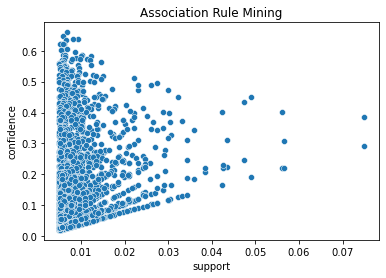

In [27]:
import seaborn as sns
sns.scatterplot(x=rules['support'],y=rules['confidence'], data=rules)
plt.title("Association Rule Mining")
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


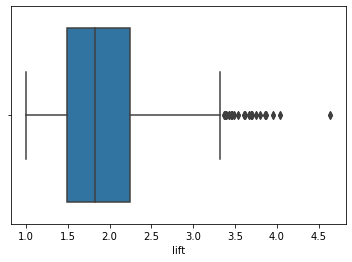

In [28]:
# Box plot
sns.boxplot(rules['lift'], data=rules,orient='v')
plt.show()

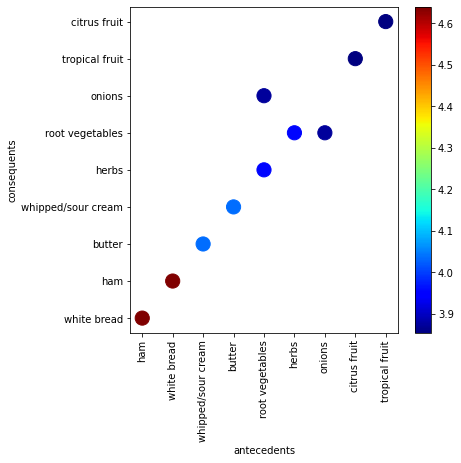

In [30]:
# Top 10

A = rules.antecedents.iloc[0:10]
B = rules.consequents.iloc[0:10]
C = rules.lift.iloc[0:10]

# abovecode give frozen set error so change A & B:

A = A.apply(lambda x: list(x)[0]).astype("unicode")
B = B.apply(lambda x: list(x)[0]).astype("unicode")

# plot figure against lift for top 10 'lift' value
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
sc = plt.scatter(A,B, s = 200, c=C, cmap=plt.cm.jet)
cbar = fig.colorbar(sc, orientation='vertical')    
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.xticks(rotation=90)
plt.show()

# Different values of support conf and length

In [31]:
Y = groceries_series['transactions'].str.join(sep='*')
Y= Y.str.get_dummies(sep='*')
Y.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [32]:
# support 0.01

frequent_itemsets = apriori(Y, min_support=0.01,max_len= None,use_colnames = True)
# Most Frequent item sets based on support in decending order
frequent_itemsets.sort_values('support',ascending = False,inplace=True)
print(frequent_itemsets)

      support                    itemsets
86   0.255516                (whole milk)
55   0.193493          (other vegetables)
66   0.183935                (rolls/buns)
75   0.174377                      (soda)
87   0.139502                    (yogurt)
..        ...                         ...
178  0.010066      (sausage, frankfurter)
306  0.010066  (curd, whole milk, yogurt)
160  0.010066          (curd, rolls/buns)
212  0.010066   (tropical fruit, napkins)
199  0.010066   (hard cheese, whole milk)

[333 rows x 2 columns]


In [33]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values('lift',ascending = False,inplace=True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
588,"(whole milk, yogurt)",(curd),0.056024,0.053279,0.010066,0.179673,3.372304,0.007081,1.154078
589,(curd),"(whole milk, yogurt)",0.053279,0.056024,0.010066,0.188931,3.372304,0.007081,1.163866
530,"(citrus fruit, other vegetables)",(root vegetables),0.028876,0.108998,0.010371,0.359155,3.295045,0.007224,1.390354
535,(root vegetables),"(citrus fruit, other vegetables)",0.108998,0.028876,0.010371,0.095149,3.295045,0.007224,1.073242
574,"(yogurt, other vegetables)",(whipped/sour cream),0.043416,0.071683,0.010168,0.234192,3.267062,0.007056,1.212206
575,(whipped/sour cream),"(yogurt, other vegetables)",0.071683,0.043416,0.010168,0.141844,3.267062,0.007056,1.114697
371,(root vegetables),"(tropical fruit, other vegetables)",0.108998,0.035892,0.012303,0.112873,3.144780,0.008391,1.086776
366,"(tropical fruit, other vegetables)",(root vegetables),0.035892,0.108998,0.012303,0.342776,3.144780,0.008391,1.355705
172,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628
173,(root vegetables),(beef),0.108998,0.052466,0.017387,0.159515,3.040367,0.011668,1.127366


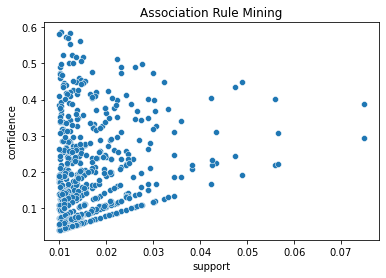

In [34]:
sns.scatterplot(x=rules['support'],y=rules['confidence'], data=rules)
plt.title("Association Rule Mining")
plt.show()

In [35]:
A = rules.antecedents.iloc[0:10]
B = rules.consequents.iloc[0:10]
C = rules.lift.iloc[0:10]

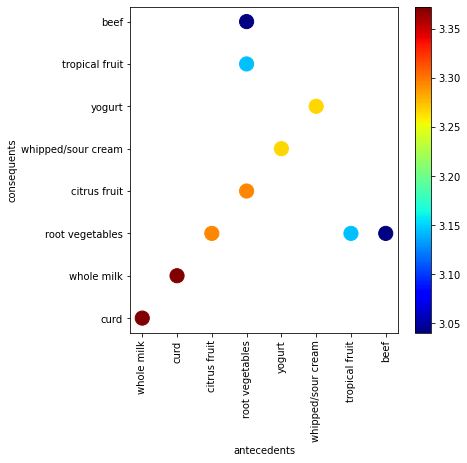

In [36]:
A1 = A.apply(lambda x: list(x)[0]).astype("unicode")
B1 = B.apply(lambda x: list(x)[0]).astype("unicode")

# plot figure against lift for top 10 'lift' value
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
sc1 = plt.scatter(A1,B1, s = 200, c=C, cmap=plt.cm.jet)
cbar = fig.colorbar(sc1, orientation='vertical')    
plt.xticks(rotation=90)
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.show()